<a href="https://colab.research.google.com/github/Rohith18744/Avacado_price_prediction/blob/main/Avacado_market_Prophet_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [3]:
avacado_df=pd.read_csv('avocado.csv')

In [4]:
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
avacado_df.shape

(18249, 14)

In [7]:
avacado_df=avacado_df.sort_values(by='Date')

In [8]:
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


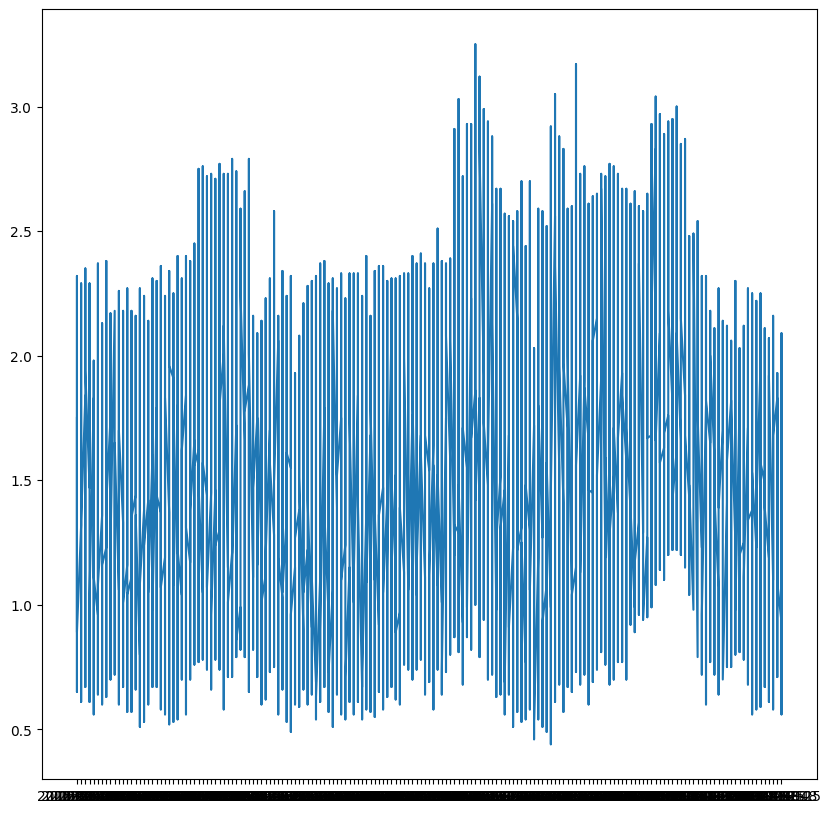

In [11]:
plt.figure(figsize=(10,10))
plt.plot(avacado_df['Date'],avacado_df['AveragePrice'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

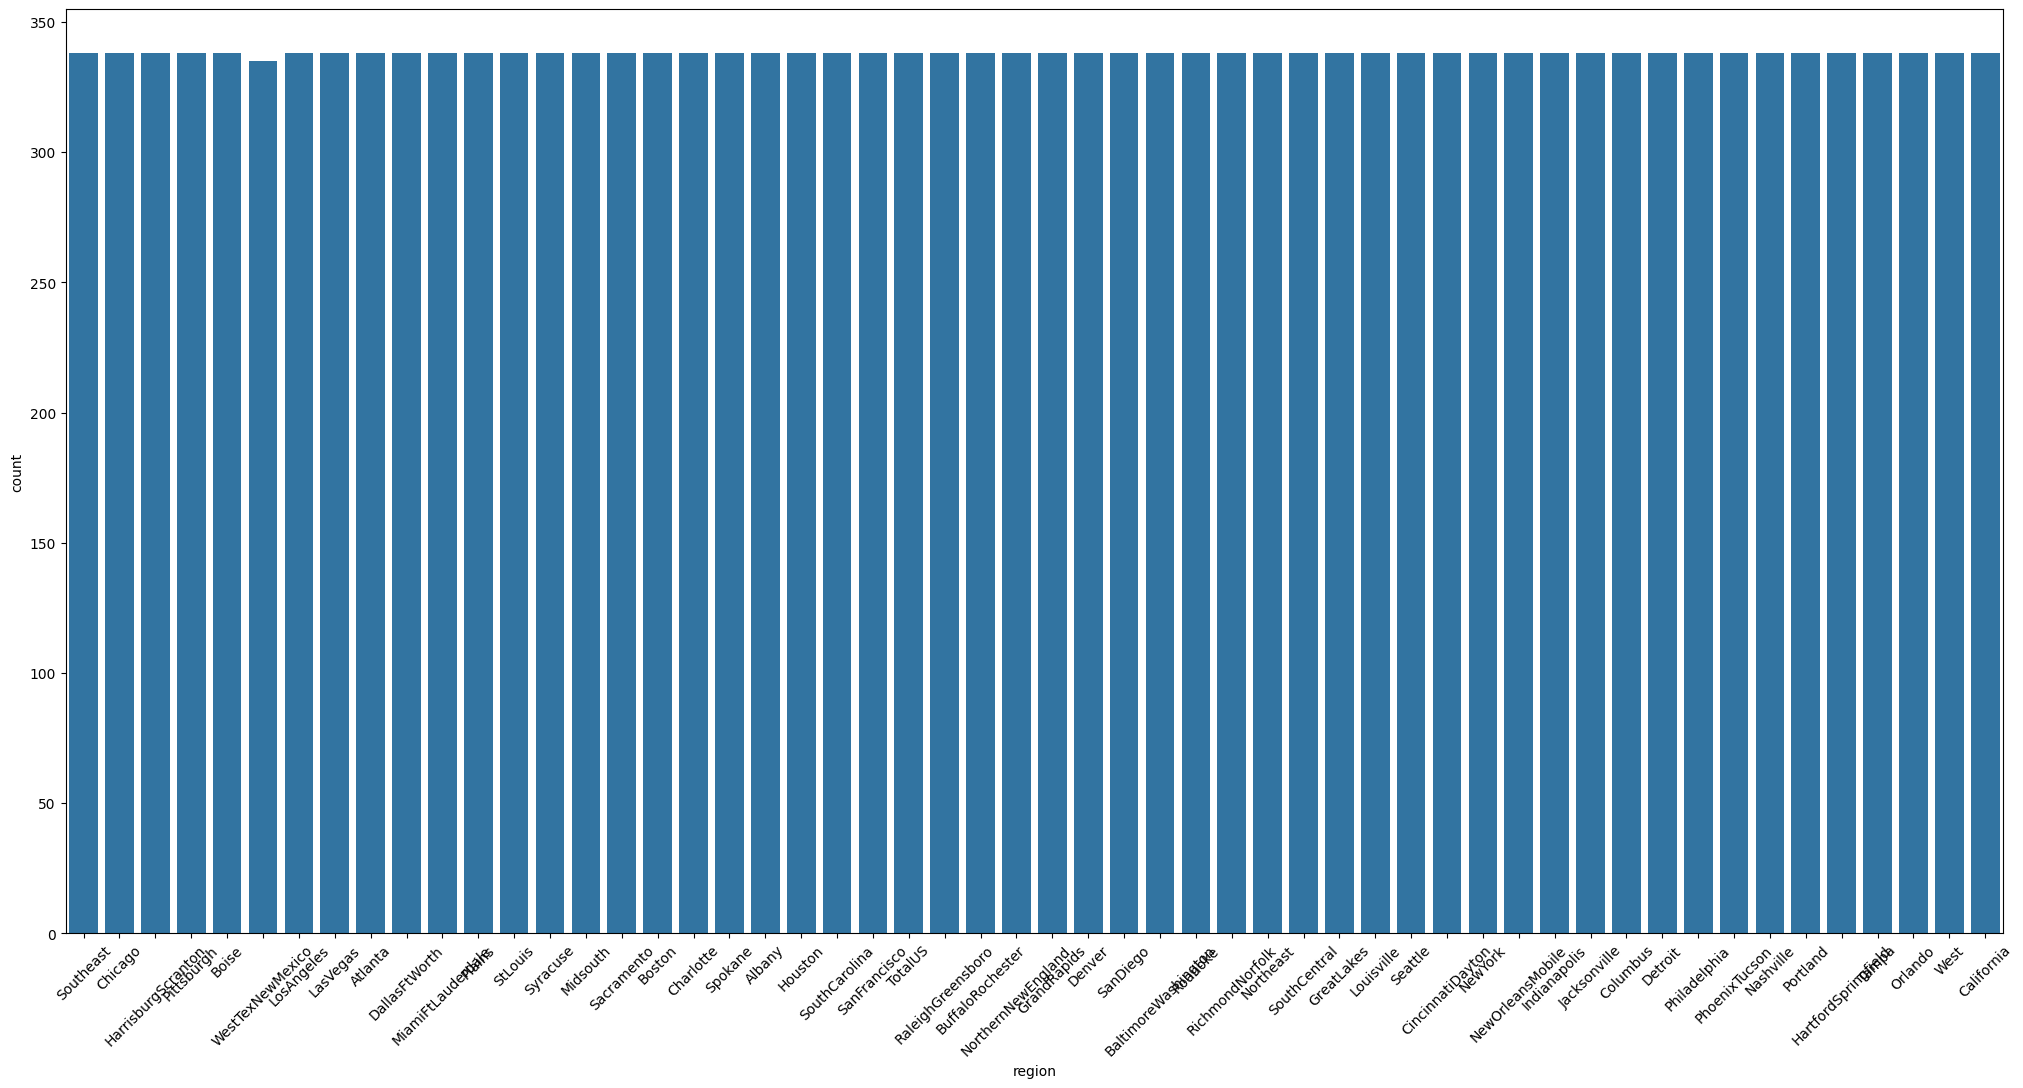

In [14]:
plt.figure(figsize=(25,12))
sns.countplot(x='region',data=avacado_df)
plt.xticks(rotation=45)

<Axes: xlabel='year', ylabel='count'>

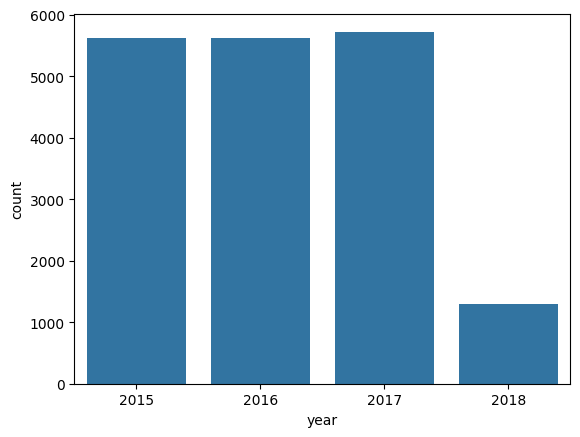

In [15]:
sns.countplot(x='year',data=avacado_df)

In [16]:
avacado_prophet_df=avacado_df[['Date','AveragePrice']]

In [17]:
avacado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [19]:
avacado_prophet_df=avacado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [20]:
avacado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [21]:
m=Prophet()
m.fit(avacado_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x8j83vd/to_le7k6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x8j83vd/d9dkcf_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79506', 'data', 'file=/tmp/tmp7x8j83vd/to_le7k6.json', 'init=/tmp/tmp7x8j83vd/d9dkcf_z.json', 'output', 'file=/tmp/tmp7x8j83vd/prophet_modelqq3lesyj/prophet_model-20250106121944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501458,0.898618,1.872135,1.501458,1.501458,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,0.0,0.0,0.0,1.383616
1,2015-01-11,1.496064,0.925900,1.856814,1.496064,1.496064,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,0.0,0.0,0.0,1.386612
2,2015-01-18,1.490671,0.888793,1.853872,1.490671,1.490671,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,0.0,0.0,0.0,1.381639
3,2015-01-25,1.485278,0.842339,1.816146,1.485278,1.485278,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,0.0,0.0,0.0,1.357576
4,2015-02-01,1.479885,0.848795,1.776297,1.479885,1.479885,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,0.0,0.0,0.0,1.324300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.157864,0.585239,1.627948,0.972662,1.366237,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,0.0,0.0,0.0,1.071793
530,2019-03-22,1.157120,0.540463,1.620860,0.970649,1.366030,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,0.0,0.0,0.0,1.072824
531,2019-03-23,1.156375,0.570824,1.577878,0.968637,1.365834,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,0.0,0.0,0.0,1.074129
532,2019-03-24,1.155630,0.544409,1.579492,0.966625,1.366118,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,0.0,0.0,0.0,1.075690


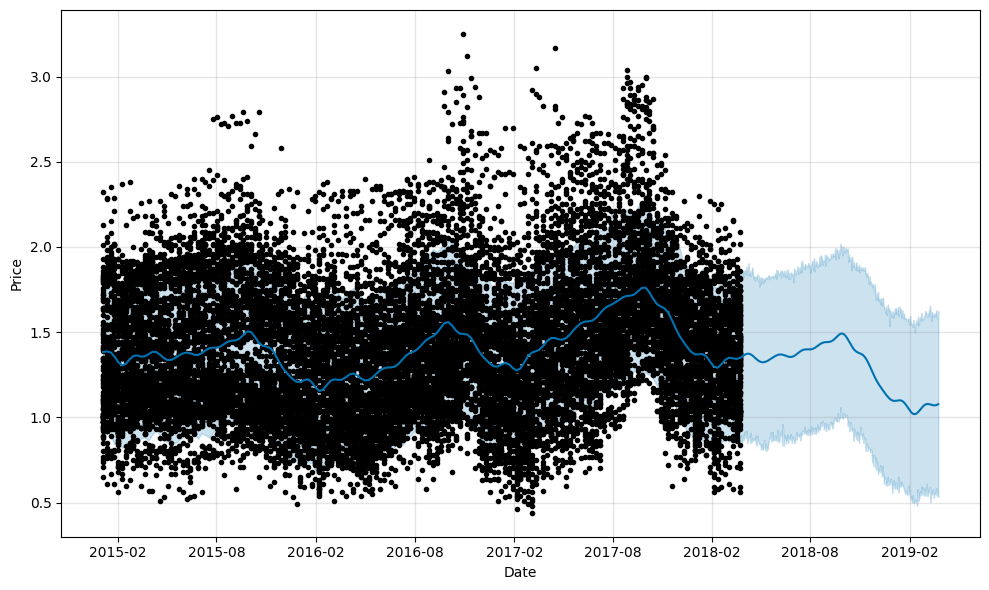

In [24]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

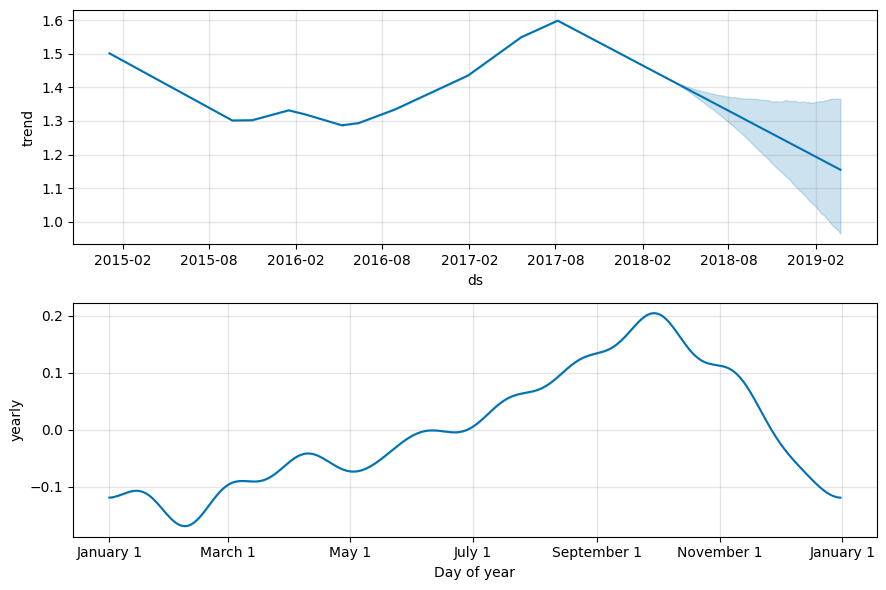

In [25]:
figure=m.plot_components(forecast)